In [7]:
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
dataset_test = pd.DataFrame(pd.read_csv("./dataset/test_preprocess.csv"))
dataset_train = pd.DataFrame(pd.read_csv("./dataset/train_preprocess.csv"))
dataset_val = pd.DataFrame(pd.read_csv("./dataset/valid_preprocess.csv"))


In [9]:
dataset_train

,label,tweet
0,happy,Ini adalah hal yang paling membahagiakan saat ...
1,anger,[USERNAME] [USERNAME] Dari pertama [USERNAME] ...
2,fear,yaudah kalo emang belum berani potong rambut p...
3,fear,"Jadi semalam, gw rekap, eh intinya yg gw usaha..."
4,anger,temen2 masa kecil yang turned out being asshol...
...,...,...
3516,fear,[USERNAME] [USERNAME] Bcs doi w anak pelayaran...
3517,anger,"Sekali , dua kali , tiga kali , lama2 bosan ju..."
3518,anger,[USERNAME] [USERNAME] [USERNAME] [USERNAME] [U...
3519,fear,Aku takut tulisan ini terbaca di saat kamu ngg...


In [10]:
dataset_test

,label,tweet
0,love,Pixy ini kok lama-lama gemesim yaaaa. Setelah ...
1,fear,Penyakit hepatitis B 100x lebih infeksius dari...
2,fear,[USERNAME] [USERNAME] [USERNAME] Gw lebih khaw...
3,anger,Kemerdekaan adalah hak segala bangsa ...( Kec ...
4,happy,"Selamat pak [USERNAME] resmi jadi bapak, seked..."
...,...,...
435,sadness,Ramadhan udah masuk hari yang ke-20 aja. tapi ...
436,sadness,kalo gue sik emang abis kehilangan seseorang y...
437,fear,"aku dong malem ini checkup darah,, ok warning ..."
438,anger,Dan besok musti pagi2 tangsel-bogor.. Dan (lag...


In [11]:
dataset_val

,label,tweet
0,anger,[USERNAME] jaringannya mati ya? Tidak bisa dib...
1,anger,It's like a circle of stupidity. Atlit gak diu...
2,anger,[USERNAME] [USERNAME] [USERNAME] [USERNAME] [U...
3,happy,[USERNAME] Selamat Siang Sahabat Pos. Kiriman ...
4,happy,"Di hari ini, yap tepat di tanggal 23 juli dima..."
...,...,...
435,anger,[USERNAME] [USERNAME] Mekanisme pemilihan dire...
436,fear,Ngasih tehaer ke keponakan. Baju dua biji cela...
437,love,HAHAHA BODO AMAT DEEHHH YG PENTING DI VIDEO IN...
438,sadness,"Langsung mewek baca thread ini, keren maksimal..."


In [83]:
print("====================================")
print("Keterangan Train")
print("====================================")
print(f'{dataset_train.info()}')
print("====================================")
print("Keterangan Test")
print("====================================")
print(f'{dataset_test.info()}')
print("====================================")


Keterangan Train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3521 entries, 0 to 3520
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   3521 non-null   object
 1   tweet   3521 non-null   object
dtypes: object(2)
memory usage: 55.1+ KB
None
Keterangan Test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   440 non-null    object
 1   tweet   440 non-null    object
dtypes: object(2)
memory usage: 7.0+ KB
None


In [84]:
print("====================================")
print("Keterangan Validation")
print("====================================")
print(f'{dataset_val.info()}')
print("====================================")

Keterangan Validation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   440 non-null    object
 1   tweet   440 non-null    object
dtypes: object(2)
memory usage: 7.0+ KB
None


In [18]:
# Label 

train_label = dataset_train['label'].unique().tolist()
[s.strip() for s in train_label]
val_label = dataset_val['label'].unique().tolist()
[s.strip() for s in val_label]
test_label = dataset_test['label'].unique().tolist()
[s.strip() for s in test_label]

print(f'''Label train dataset         = {train_label}
Label Validation dataset    = {val_label}
label test dataset          = {test_label}''')

Label train dataset         = ['happy', 'anger', 'fear', 'sadness', 'love']
Label Validation dataset    = ['anger', 'happy', 'fear', 'love', 'sadness']
label test dataset          = ['love', 'fear', 'anger', 'happy', 'sadness']


In [45]:
# menghitung banyak dataset setiap label dari train dataset 

totalLabelTest = dataset_test['label'].value_counts()
totalLabelTrain = dataset_train['label'].value_counts()
totalLabelValid = dataset_val['label'].value_counts()

print(f'''Dataset train  :
{totalLabelTrain}
=============================
Dataset Test:
{totalLabelTest}
=============================
Dataset Valid:
{totalLabelValid}''')



Dataset train  :
label
anger      881
happy      814
sadness    798
fear       519
love       509
Name: count, dtype: int64
Dataset Test:
label
anger      110
happy      101
sadness    100
fear        65
love        64
Name: count, dtype: int64
Dataset Valid:
label
anger      110
happy      102
sadness     99
fear        65
love        64
Name: count, dtype: int64


Text(0, 0.5, 'Jumlah Dataset')

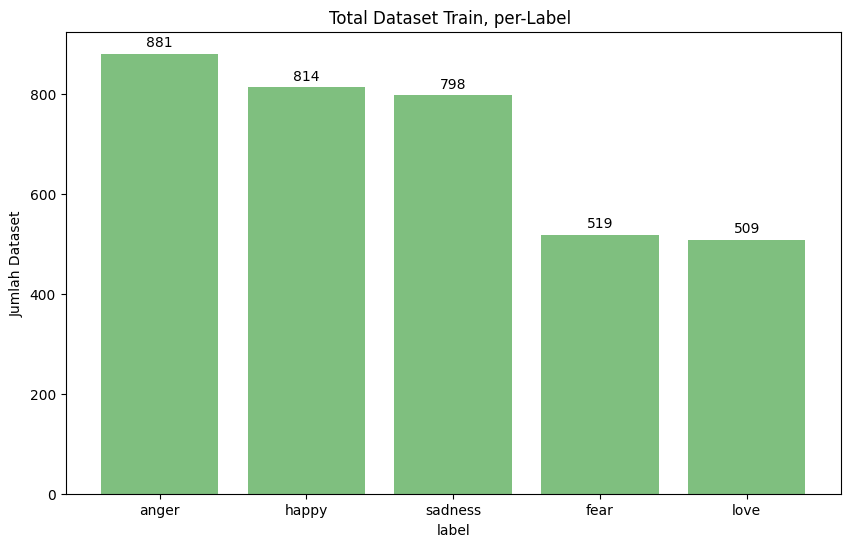

In [53]:
# Train Dataset

plt.figure(figsize=(10, 6))  # Ukuran plot

plt.title("Total Dataset Train, per-Label ")
train = plt.bar(totalLabelTrain.index, totalLabelTrain.values, color='green', alpha=0.5, label='Train Data')
for bar in train:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), 
                 textcoords='offset points',
                 ha='center', va='bottom')
    
plt.xlabel("label")
plt.ylabel('Jumlah Dataset')

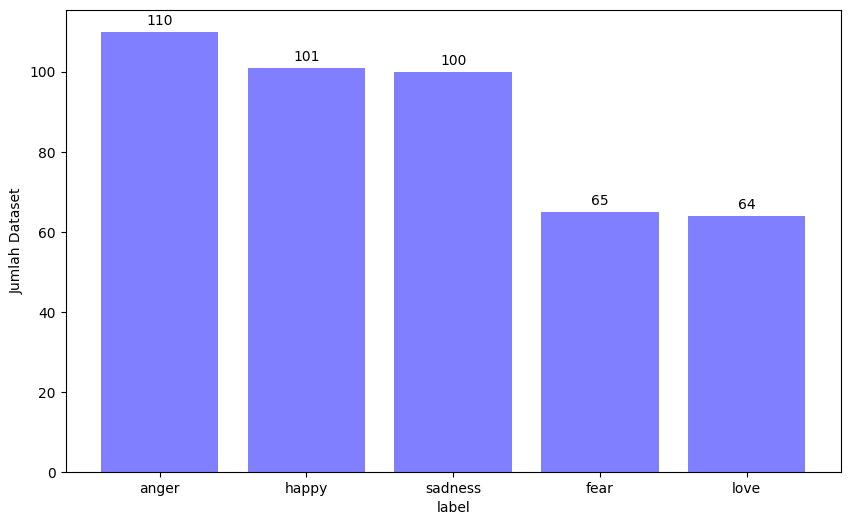

In [59]:
plt.figure(figsize=(10,6))
test = plt.bar(totalLabelTest.index, totalLabelTest.values, color='blue', alpha=0.5, label='Test Data')
for bar in test:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), 
                 textcoords='offset points',
                 ha='center', va='bottom')
    
plt.xlabel("label")
plt.ylabel('Jumlah Dataset')
plt.show()

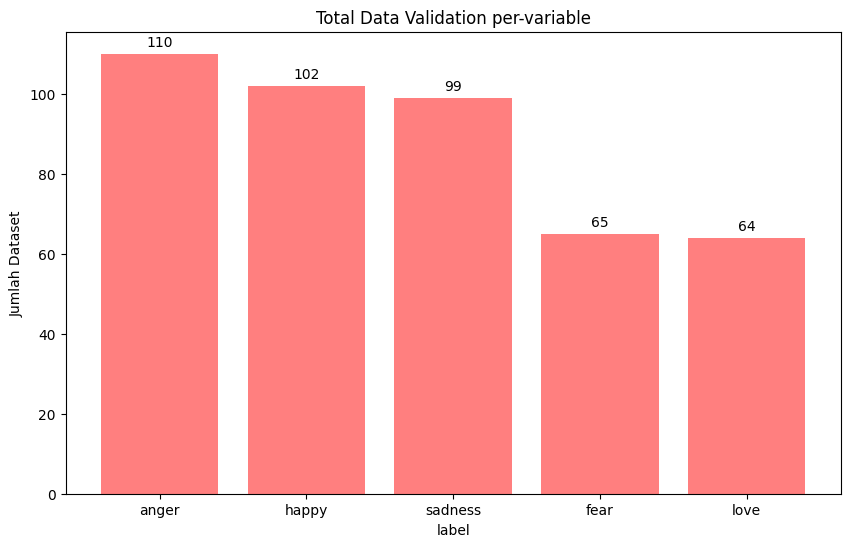

In [55]:
plt.figure(figsize=(10, 6))


plt.title('Total Data Validation per-variable')
validation = plt.bar(totalLabelValid.index, totalLabelValid.values, color='red', alpha=0.5, label='Validation Data')

for bar in validation:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), 
                 textcoords='offset points',
                 ha='center', va='bottom')
    
plt.xlabel("label")
plt.ylabel('Jumlah Dataset')
plt.show()